In [2]:
## Genera bien imágenes, pero no con mucho detalle.
## Probé con algunas imágenes, pero solo una a la vez.
!pip install accelerate transformers safetensors opencv-python diffusers

Defaulting to user installation because normal site-packages is not writeable


In [1]:
!pip install diffusers

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from diffusers import ControlNetModel, StableDiffusionXLControlNetPipeline, AutoencoderKL
from diffusers.utils import load_image
from PIL import Image
import torch
import numpy as np
import cv2

prompt = "Floor Plan 2D, Many Details, Image of white background"
negative_prompt = 'low quality, bad quality, sketches'

image = load_image(f"teste5.png")

controlnet_conditioning_scale = 0.5

controlnet = ControlNetModel.from_pretrained(
    "TheMistoAI/MistoLine",
    torch_dtype=torch.float16,
    variant="fp16",
)
vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipe = StableDiffusionXLControlNetPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    controlnet=controlnet,
    vae=vae,
    torch_dtype=torch.float16,
)
pipe.enable_model_cpu_offload()

image = np.array(image)
image = cv2.Canny(image, 100, 200)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
image = Image.fromarray(image)

images = pipe(
    prompt, negative_prompt=negative_prompt, image=image, controlnet_conditioning_scale=controlnet_conditioning_scale,
    ).images

images[0].save(f"hug_lab.png")


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]
2024-05-20 07:55:01.637315: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-20 07:55:01.705691: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following

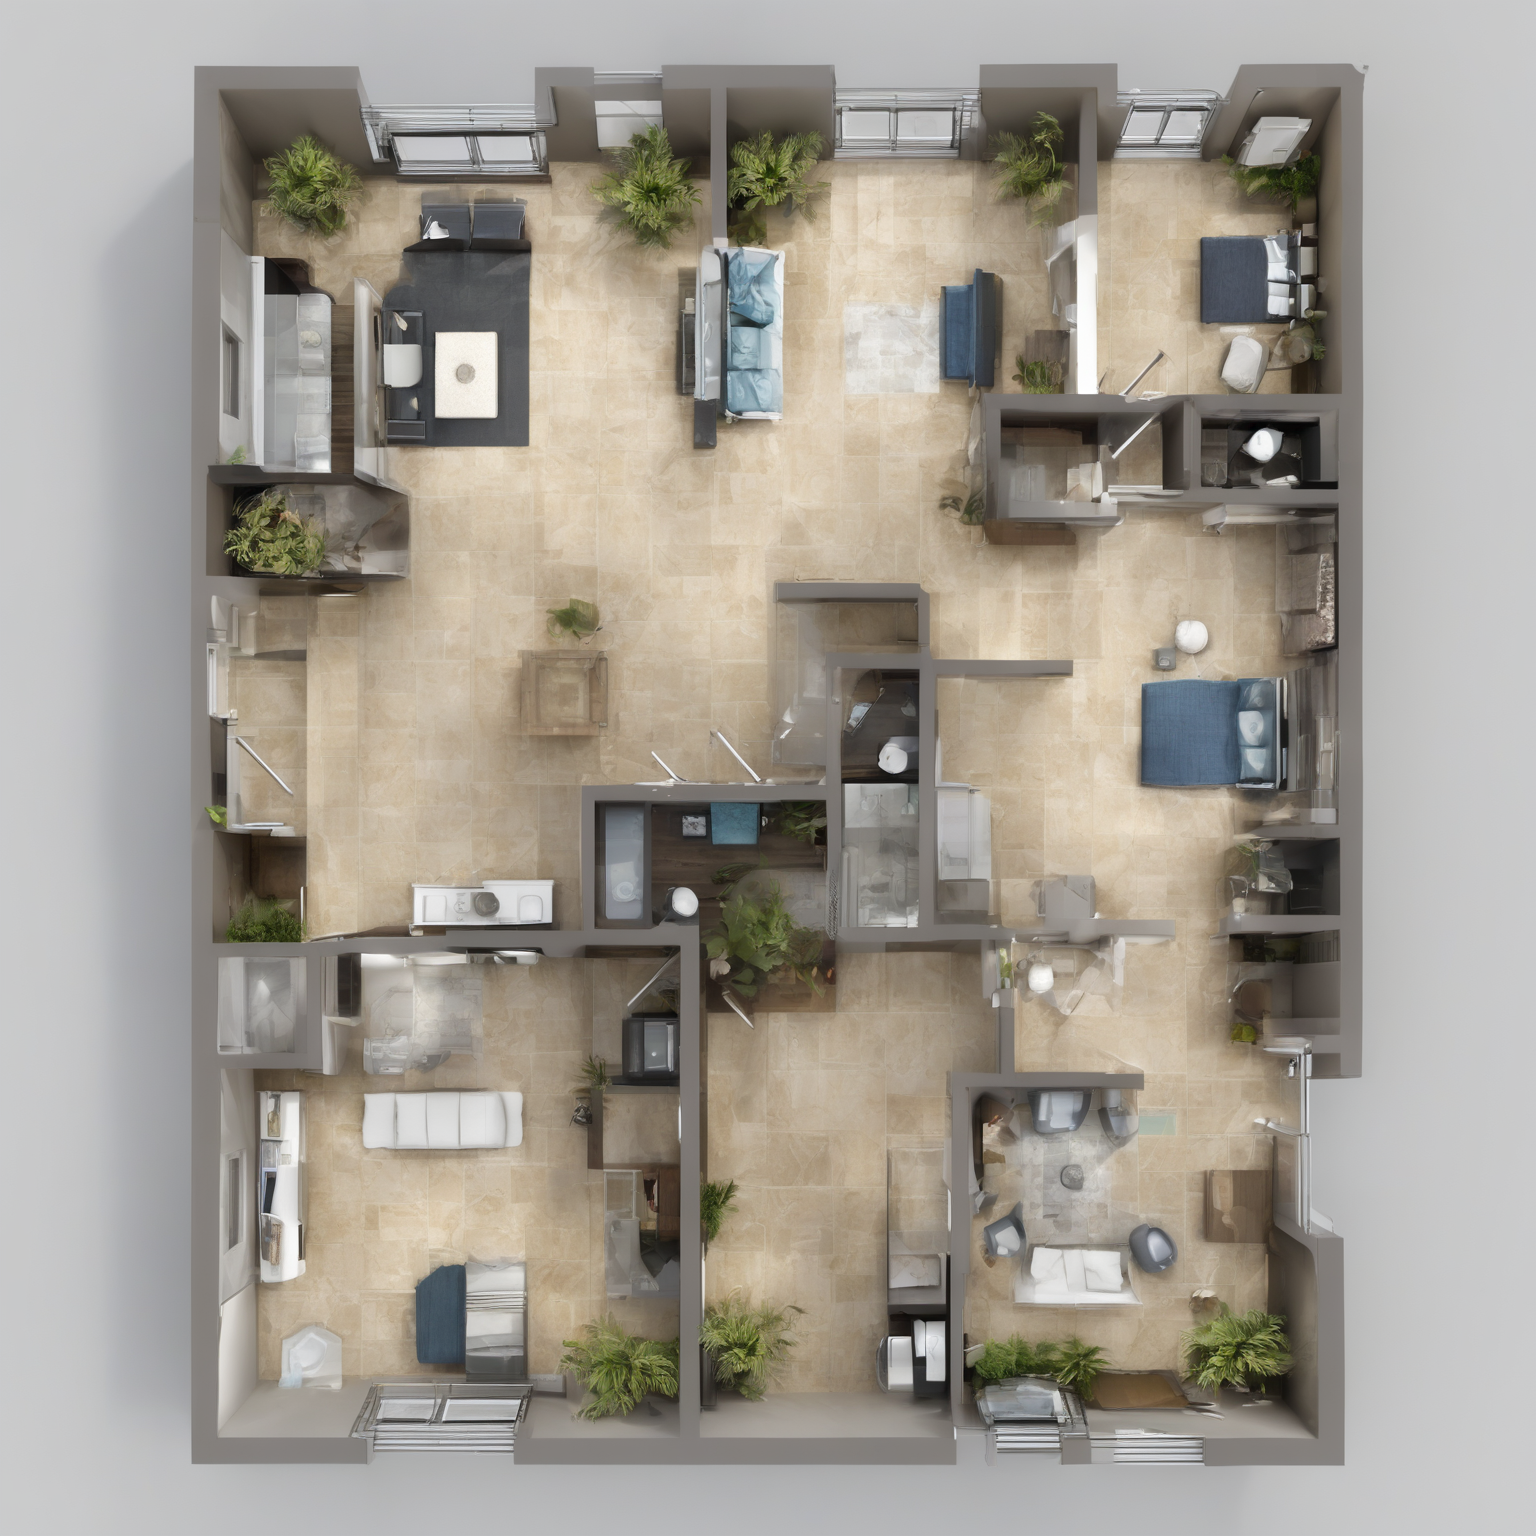

In [4]:
image = load_image(f"hug_lab.png")
image

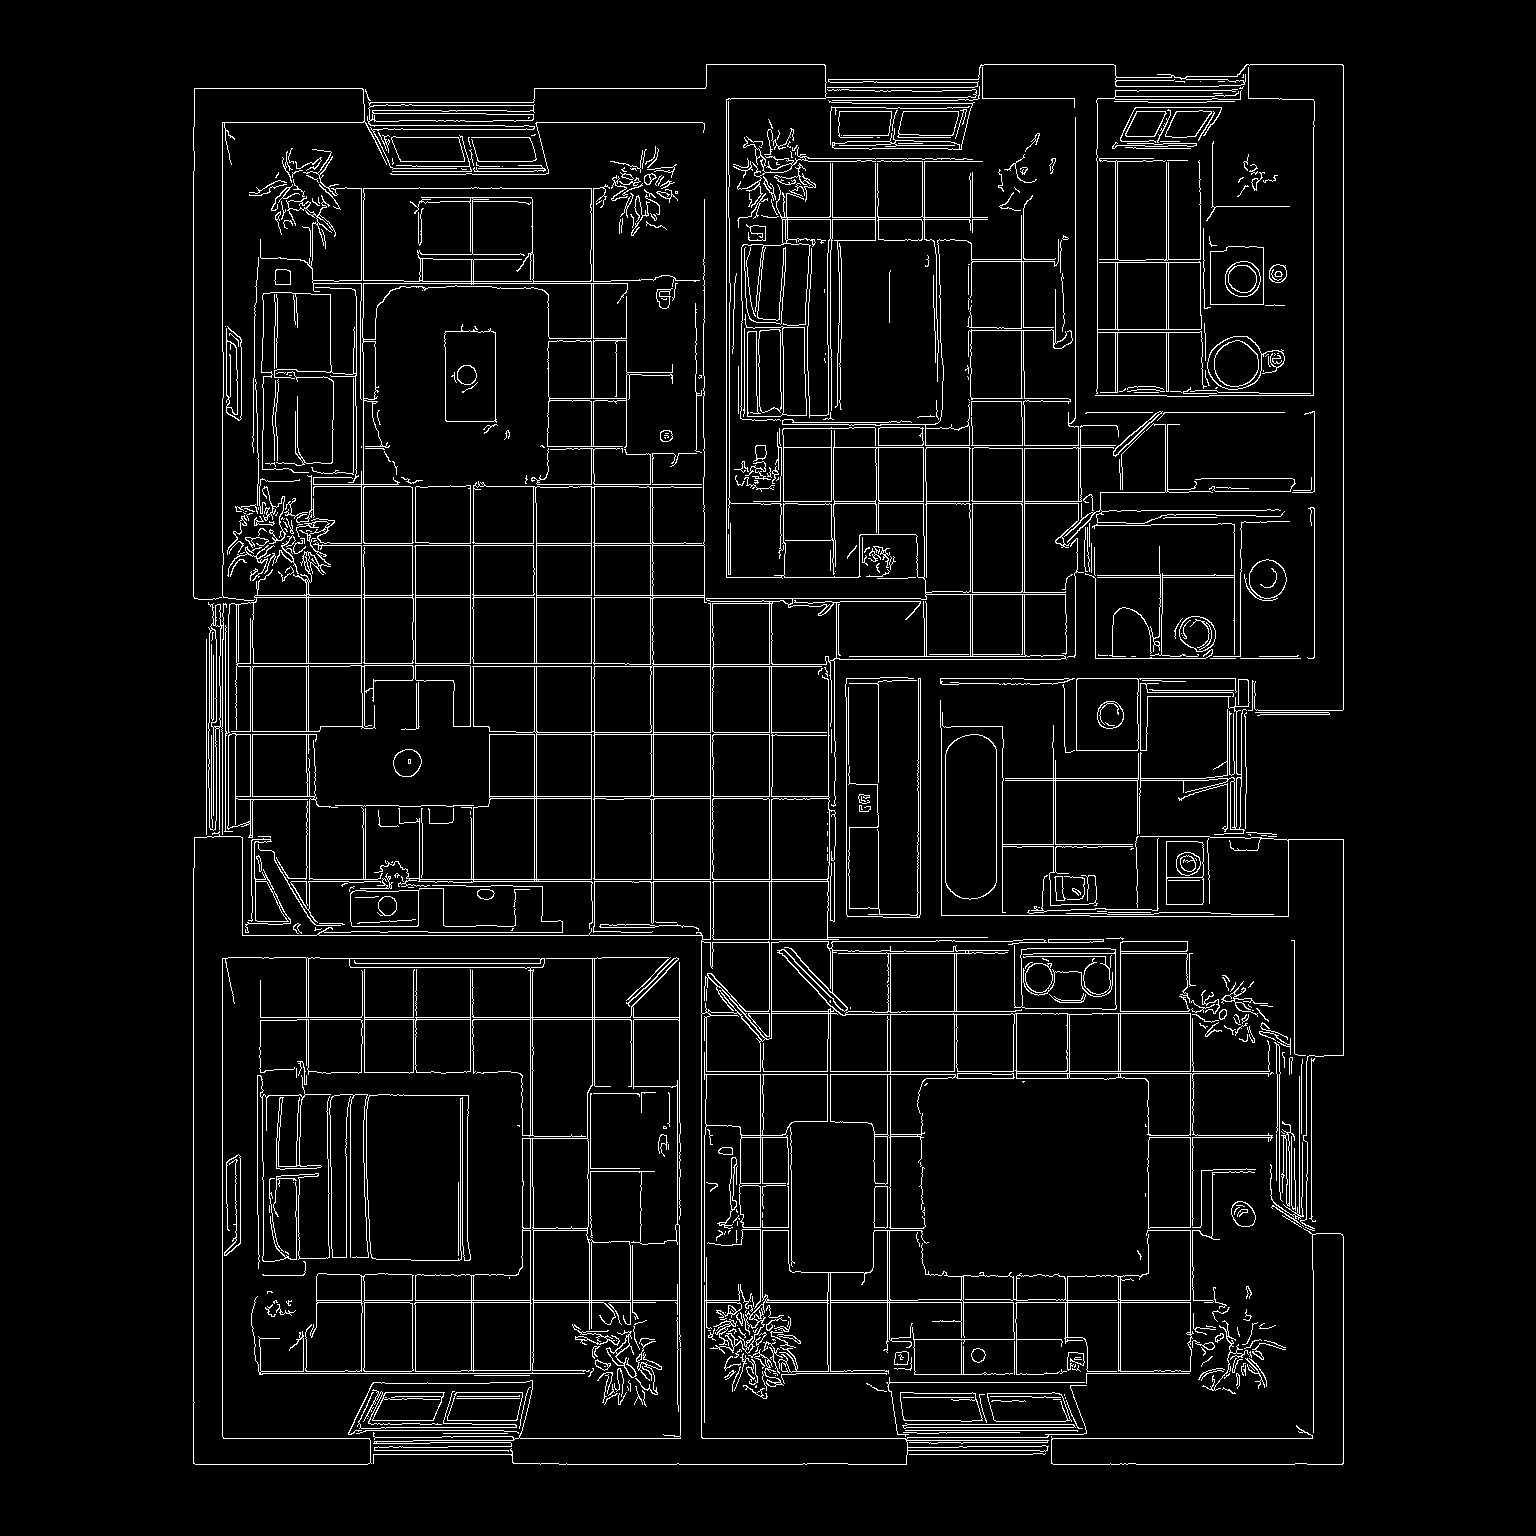

In [6]:
image = load_image(f"teste5.png")
image = np.array(image)
image = cv2.Canny(image, 100, 200)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
image = Image.fromarray(image)
image